In [1]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Спрятать/показать исходный код."></form>''')

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = int(input("Сколько случайных чисел сгенирировать?(20)") or "20")
min = int(input("Максимальное значение?(0)") or 0)
max = int(input("Максимальное значение?(1)") or 1)
mode = (input("Генерировать рациональные числа вместо целых?(да)") or "да").lower()[0]
m = math.floor(1 + 3.22 * np.log10(N))
m = int(input("Колличество столбиков диаграммы?({})".format(m)) or str(m))

In [4]:
if mode == "д":
    raw_row = min + np.random.rand(N) * max
else:
    raw_row = np.random.randint(min, max + 1, N)
row = np.sort(raw_row)
#Размах
range = row[-1] - row[0]
#Мода
counter = {}
unique = set(row)
moda_max = {"num": -1, "count": 0}
for e in unique:
    count = np.sum([row == e])
    if count > moda_max["count"]:
        moda_max = {"num":[e], "count": count}
    elif count == moda_max["count"]:
        moda_max["num"].append(e)
moda = moda_max["num"]
#Медиана
median = (row[len(row) // 2 - 1] + row[len(row) // 2]) / 2
#Среднее
mean = np.sum(row) / len(row)
#Дисперсия
dispersion = np.sum((row - mean) ** 2) / len(row)
#Среднее квадратичное
mean_square = np.sum(row ** 2) / len(row)
#Эмпирическая функция
low = row[0] - range * 0.1
high = row[-1] + range * 0.1
emperic_function = [(low, 0)]
c = 0
for num in row:
    emperic_function.append((num, c / len(row)))
    c += 1
    emperic_function.append((num, c / len(row)))
emperic_function.append((high, 1))
emperic_function = np.array(emperic_function)

Выборка: [0.06914468 0.29936828 0.37520405 0.48260573 0.70878189 0.727701
 0.36930868 0.6517977  0.9326578  0.66662721 0.82026338 0.0080355
 0.36420392 0.47150896 0.23090524 0.43742153 0.13192192 0.31167684
 0.03225407 0.88060166]
Вариационный ряд: [0.0080355  0.03225407 0.06914468 0.13192192 0.23090524 0.29936828
 0.31167684 0.36420392 0.36930868 0.37520405 0.43742153 0.47150896
 0.48260573 0.6517977  0.66662721 0.70878189 0.727701   0.82026338
 0.88060166 0.9326578 ]
Размах: 0.9246222959917929
Мода: не найдена, так как ни одно число не повторяется
Медиана: 0.40631278859760017
Выборочное среднее: 0.44859950201863324
Дисперсия: 0.07571062878372739
Выборочное среднее квадратичное: 0.27695214199509316
Эмперическая функция:


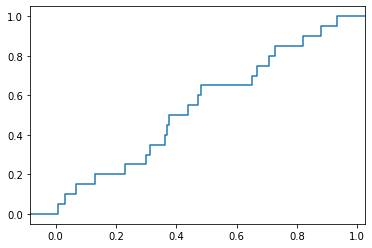

Гистограмма:


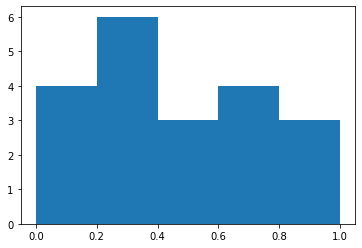

In [5]:
print("Выборка: {}".format(raw_row))
print("Вариационный ряд: {}".format(row))
print("Размах: {}".format(range))
if len(moda) != len(row):
    print("Мода: {}".format(moda))
else:
    print("Мода: не найдена, так как ни одно число не повторяется")
print("Медиана: {}".format(median))
print("Выборочное среднее: {}".format(mean))
print("Дисперсия: {}".format(dispersion))
print("Выборочное среднее квадратичное: {}".format(mean_square))
print("Эмперическая функция:")
plt.plot(emperic_function[:, 0], emperic_function[:, 1])
plt.xlim(low, high)
plt.show()
print("Гистограмма:")
plt.hist(row, bins=m, range=(math.floor(row[0]),math.ceil(row[-1])))
plt.show()